# Project Viral App Predictor

## Goal:

* Find the drivers behind Google application downloads on the Google Play Store.
* Create a model that accurately predicts the likelihood an application will be downloaded 1 million or more times.
* Test the effectiveness of ensemble style models on accuracy. 


## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import gen_wrangle1 as gw
import auto_model2a1 as am
#hide warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier






# <div class="alert alert-block alert-info">  Wrangle 
### Acquiring CSV
* Dataset name is titled Google PlayStore Apps
* Data acquired from Kaggel.com thanks to Gautham Prakash
* Each row represents a Google application
* Each column represents a feature

### Prepare:
* Loaded CSV file as a dataframe
* Renamed columns
* Encoded and dummied relevant features 
* Dropped all apps with less than 1000 downloads
* Dropped all apps that were created before or after 2020
* Created columns:
	* “Same_dev_id”
	* "days_since_release"

* Dropped unneeded columns: "installs", "released", "developer_email", "developer_website", "privacy_policy", “developer_id”
* Checked and fixed:
	* Nulls and NaNs
	* Data types
	* Downloads column: created a column “Viral” for the target variable (True/False categorical)
* Outliers: to be an outlier is the goal for app creation.

### Data Dictionary: 
* Explanation of dataset features



| Feature | Definition (measurement)|
|:--------|:-----------|
|App Name| Name of the app|
|App Id| app id|
|Category| Category the app is in (selected by creator)| 
|Rating| Quality rating given by users out of max score of 5| 
|Rating Count| Total count of the user rating| 
|Installs| Total number of installs the app has| 
|Minimum Installs| the minimum installs the app has|
|Maximum Installs| the maximum installs the app has| 
|Free| If the app is free or not|
|Price| The price of the app|
|Currency| The currency of the cost of the app|
|Size| Size of the app in kb|
|Minimum Android| The minimum Android OS needed to run the app|
|Developer Website| The website address for the developer|
|Developer Email| The Email address of the developer|
|Released| The date the app was released| 
|Privacy Policy| The link to the Privacy Policy|
|Last Updated| The date of the app’s last update|
|Content Rating| The content rating of the app|
|Ad Supported| If the app has built in ads|
|In app purchases| If the app has in app purchases| 
|Editor Choice| If the app has an editor choice award|
|Viral| If the app has 1 million or more downloads (Target Variable)|


In [2]:
#Funcions for data prep
df=gw.get_csv("Google-Playstore.csv")
df=gw.prep_it(df)

CSV found


### Split

In [3]:
#Funciont for split
train_df, validate_df, test_df = gw.split_function_cat_target(df, 'viral')

<div class="alert alert-block alert-info"> 
    
## Explore
    
### Questions To Answer:
1. Does the number of days since an app's release date affect if a million+ downloads a reached (viral)?
2. Does editors choice and/or rating affect viral? 
3. Does content rating affect viral?
4. What are the best features to use?

## 1. Does the number of days since an app’s release date affect the likelihood it goes viral?

Null Hypothesis: There is no linear correlation between DAYS_SINCE_RELEASE and viral
DAYS_SINCE_RELEASE and viral


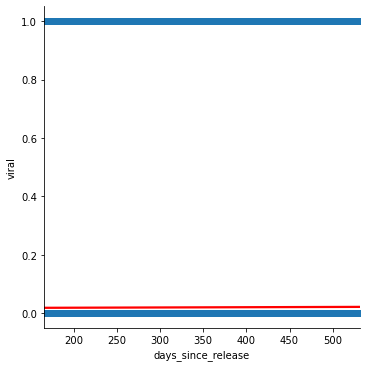

t = 2.0752878870999805, p = 0.03806986405597607, alpha = .05
We reject the null hypothesis
--------------------------------------------------------------------


In [4]:
#Calls pairwise and t-test function
gw.single_pairwise(train_df, "viral", "days_since_release")

### No. While we can reject the null hypothesis the number of days an app has been out does not significantly affect it’s viral chances.

## 2. Does editors choice and/or rating affect viral? 

Null Hypothesis: There is no linear correlation between EDITORS_CHOICE and viral
EDITORS_CHOICE and viral


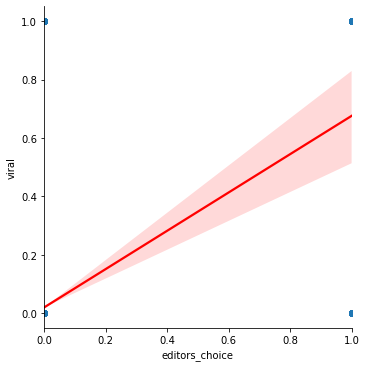

t = 4.874225047740132, p = 1.1662553430170322e-06, alpha = .05
We reject the null hypothesis
--------------------------------------------------------------------
Null Hypothesis: There is no linear correlation between RATING and viral
RATING and viral


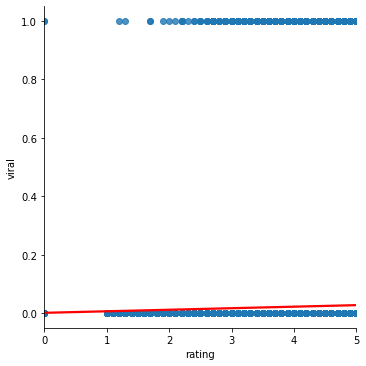

t = 48.5289340703011, p = 0.0, alpha = .05
We reject the null hypothesis
--------------------------------------------------------------------


In [5]:
#Calls pairwise and t-test function
gw.single_pairwise(train_df, "viral", "editors_choice")
#Calls pairwise and t-test function
gw.single_pairwise(train_df, "viral", "rating")

### Yes, editor’s choice has a significant effect on an app’s viral chances. Yes, an app’s rating does have a small but positive effect on its chances of going viral. 

## 3. Does content rating affect viral?

Null Hypothesis: EVERYONE 10+ does not affect viral

EVERYONE 10+ and viral


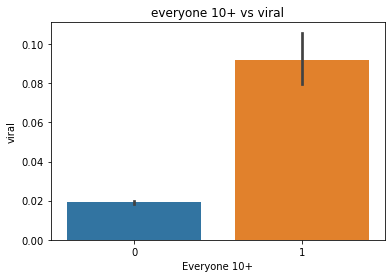


ANALYZE and SUMMARIZE
Observed
[[109672   2152]
 [  1656    168]]

Expected
[[109541   2282]
 [  1786     37]]

----
chi^2 = 472.8124
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------


In [6]:
# Calls a function to chart a continuous variable against the target and runs a chi-square test
gw.cat_on_target(train_df, "viral", "viral", "Everyone 10+")

### Yes, an app’s content rating does have an effect on it going viral. 

## What are the best features to use?
### A data frame created using the kbest test of the top 10 features correlated with the target variable:

In [7]:
#Calls a function to split X,y, scales data and runs a kbest test
X_train, y_train, X_validate, y_validate, X_test, y_test = gw.x_y_split(train_df, validate_df, test_df)
train_scaled, validate_scaled, test_scaled = gw.scale_data(X_train, X_validate, X_test)
kbest_results=gw.select_kbest(train_scaled, y_train)
kbest_results.sort_values(by="f_score", ascending=False).head(10)

,p_value,f_score
in_app_purchases,0.000000e+00,3481.651628
file_size,0.000000e+00,1953.541036
editors_choice,1.909608e-175,800.283558
Everyone 10+,7.705595e-106,478.446363
Everyone,5.025891e-84,377.843811
Weather,5.736066e-72,322.304469
Simulation,9.991718e-70,311.987692
rating,2.384413e-65,291.840211
Role Playing,5.825880e-65,290.055017
ad_supported,1.077131e-50,224.459157


### The top two visualized and tested:

Null Hypothesis: IN_APP_PURCHASES does not affect viral

IN_APP_PURCHASES and viral


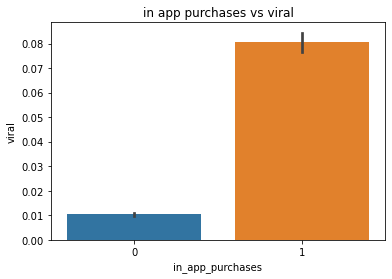


ANALYZE and SUMMARIZE
Observed
[[96604  1029]
 [14724  1291]]

Expected
[[95639  1993]
 [15688   326]]

----
chi^2 = 3374.7148
p-value = 0.0000
----
We reject the null hypothesis.

--------------------------------------------------------------------------------------------------------------------------
Null Hypothesis: There is no linear correlation between FILE_SIZE and viral
FILE_SIZE and viral


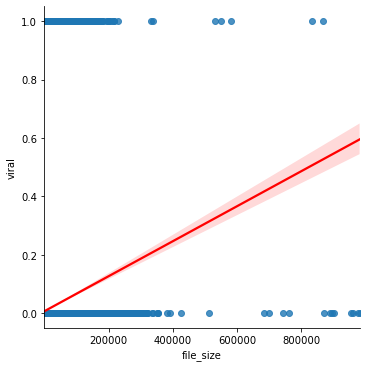

t = 25.905788506592256, p = 3.548262199300643e-130, alpha = .05
We reject the null hypothesis
--------------------------------------------------------------------


In [8]:
#Calls a function to chart a continuous variable against the target and runs a chi-square test
gw.cat_on_target(train_df, "viral", "viral", "in_app_purchases")
gw.single_pairwise(train_df, "viral", "file_size")

<div class="alert alert-block alert-info">  

## Explore Takeaways:
1. Does the number of days since an app's release date affect viral?
    * Surprisingly, no. This is likely due to the fact that most apps, due to quality and other variables beyond the scope of this initial project, will never make it pass 0 downloads 
    no matter how long they stay on the app store.
2. Does editors choice and/or rating affect viral? 
    * Yes editors choice has a significant effect on going viral but user rating has very little positive impact on going viral. This indicates that users of the app store put more stock in the “editor” versus other users. 
3. Does content rating affect viral?
    * Yes, going for the largest audience possible by having a low content rating has a very significant impact on the app’s likelihood of going viral. 
4. What are the best features to use?

| Feature | p_value | f_score |
|:--------|:--------|:---------|    		
|in_app_purchases|	0.000000e+00|	3481.651628|
|file_size|	0.000000e+00|	1953.541036|
|editors_choice|	1.909608e-175|	800.283558|
|Everyone 10+|	7.705595e-106|	478.446363|
|Everyone|	5.025891e-84|	377.843811|
|Weather|	5.736066e-72|	322.304469|
|Simulation|	9.991718e-70|	311.987692|
|rating|	2.384413e-65|	291.840211|
|Role Playing|	5.825880e-65|	290.055017|
ad_supported|	1.077131e-50|	224.459157|

* These features will be used in the first iteration of modeling. 

* The high correlation between in-app purchases and going viral is likely related to the fact that games and other popular apps have in-app purchases not because users love in-app purchases.   
* A similar reason is likely driving the correlation between file size and going viral. Games and other sophisticated apps require larger file sizes.  

<div class="alert alert-block alert-info"> 

## Preprocessing

* Encoded any categoricals

* Split into X_train, y_train, X_validate, y_validate, X_test, y_test using the above selected features for the first iteration of modeling. 



<div class="alert alert-block alert-info"> 
    
# Modeling Overview
        
## Features to Used 
* The first iteration uses the top ten features   
* The second iteration of modeling uses all features 
* The third iteration of modeling uses all features and a avariety of ensemble modeling methods 
   
---
# Models Used and Metrics       

## **Classification Models Used:**
    
* K-Nearest Neighbors
* Random Forest
* Gradient Boosting Classifier
* Random Forest of Random Forest 
* Logistic Regression
 
#### Baseline: 97.96%    
#### Accuracy and precision are the evaluation metrics

# Modeling with top 10 features
### Baseline: 97.96

In [9]:
# Sets X and y
X_train, y_train, X_validate, y_validate, X_test, y_test = gw.x_y_split_top_10(train_df, validate_df, test_df)

## KNN with top features

In [10]:
#calls the function to run a knn model
am.auto_knn_scores(X_train, y_train, X_validate, y_validate)

   k  train_accuracy  validate_accuracy     delta
0  3        0.981117           0.977167  0.003951
2  5        0.980035           0.978302  0.001733
1  4        0.980158           0.979067  0.001091


### Fails to beat baseline

## Logistic regression with top features

In [11]:
#Calls the Logistic Regression function
am.auto_lo_regress_scores(X_train, y_train, X_validate, y_validate)

   c_range  train_accuracy  validate_accuracy     delta
0      0.1        0.979586           0.979569  0.000017
1      0.2        0.979586           0.979569  0.000017
2      0.3        0.979586           0.979569  0.000017
3      0.4        0.979586           0.979569  0.000017
4      0.5        0.979586           0.979569  0.000017
5      0.6        0.979586           0.979569  0.000017
6      0.7        0.979586           0.979569  0.000017
7      0.8        0.979586           0.979569  0.000017
8      0.9        0.979586           0.979569  0.000017


### Fails to beat baseline

## Random Forest with top features

In [12]:
#Calls the Decision Tree function
am.auto_random_forest_scores(X_train, y_train, X_validate, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
14         19        0.985437           0.977800  0.007637
13         18        0.984751           0.978275  0.006476
12         17        0.983898           0.978671  0.005226
11         16        0.983264           0.978909  0.004355
10         15        0.982490           0.979384  0.003106
9          14        0.981689           0.979384  0.002305
8          13        0.981012           0.979463  0.001548
7          12        0.980642           0.979542  0.001100
6          11        0.980255           0.979674  0.000581
5          10        0.980000           0.979648  0.000352
4           9        0.979912           0.979595  0.000317
3           8        0.979859           0.979595  0.000264
1           6        0.979797           0.979621  0.000176
2           7        0.979815           0.979674  0.000141
0           5        0.979692           0.979569  0.000123


### Beats baseline at a max depth of 7 with 97.97% accuracy and is also the best model

## Testing on the best model


------------------------ Test Model with depth of 7 Scores------------------------------
                      0           1  accuracy     macro avg  weighted avg
precision      0.980501    0.136986  0.973999      0.558743      0.963289
recall         0.993209    0.051746  0.973999      0.522478      0.973999
f1-score       0.986814    0.075117  0.973999      0.530966      0.968211
support    37110.000000  773.000000  0.973999  37883.000000  37883.000000
------------ Metrics ----------
Accuracy is 0.9739988913232849


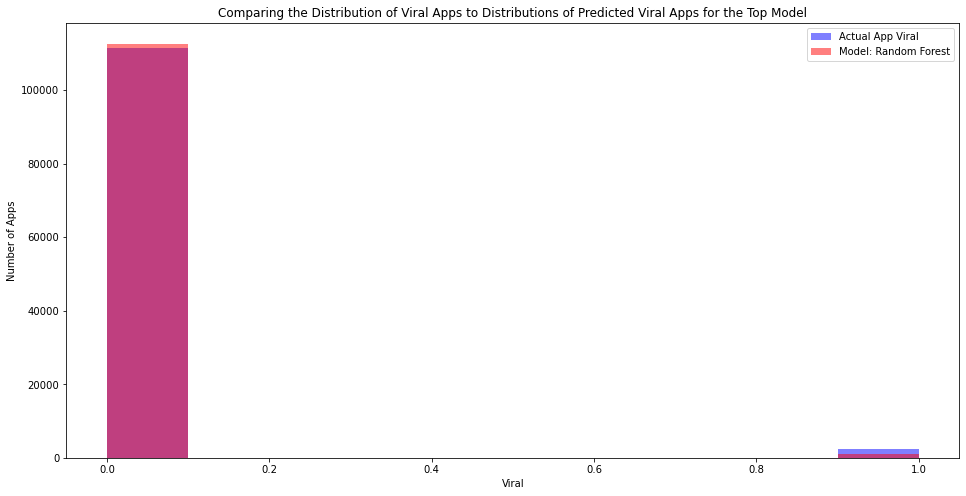

In [13]:
am.auto_random_trees_test(X_test, y_test, X_train, y_train, max_depth = 7)

### The test model failed to beat the baseline. 

# Modeling on all features

In [14]:
#Sets X and y for all features
X_train, y_train, X_validate, y_validate, X_test, y_test = gw.x_y_split(train_df, validate_df, test_df)

## Gradient Boosting Classifier with all features

In [15]:
#GradientBoostingClassifier
am.auto_gradient_boosting_classifier(X_train, y_train, X_validate, y_validate)


Train score: 0.9797268759679009
Validate score: 0.9797006572869097
                      0           1  accuracy     macro avg  weighted avg
precision      0.979749    0.777778  0.979701      0.878763      0.975622
recall         0.999946    0.009044  0.979701      0.504495      0.979701
f1-score       0.989744    0.017880  0.979701      0.503812      0.969888
support    37109.000000  774.000000  0.979701  37883.000000  37883.000000


### Validation beats baseline with a 97.97% accuracy

## KNN with all features

am.auto_knn_scores(X_train, y_train, X_validate, y_validate)
* This model takes 28 minutes to run. The output is as follows:

| Index | K | train_accuracy | validate_accuracy | delta
|:------|:--|:---------------|:------------------|:-----| 
|0|  3|        0.980915|           0.977272|  0.003643|
|2|  5|        0.979841|           0.979226|  0.000616|
|1|  4|        0.979815|           0.979437|  0.000378|

* If you want you can run the model by running the function at the top

### Fails to beat baseline

## Random Forest with all features

In [16]:
am.auto_random_forest_entropy_scores(X_train, y_train, X_validate, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
14         19        0.981812           0.979833  0.001980
13         18        0.981328           0.979780  0.001548
12         17        0.980880           0.979806  0.001073
11         16        0.980510           0.979753  0.000757
10         15        0.980149           0.979701  0.000449
9          14        0.980061           0.979753  0.000308
8          13        0.979956           0.979701  0.000255
6          11        0.979744           0.979648  0.000097
7          12        0.979736           0.979648  0.000088
5          10        0.979630           0.979569  0.000061
4           9        0.979595           0.979569  0.000026
0           5        0.979586           0.979569  0.000017
1           6        0.979586           0.979569  0.000017
2           7        0.979586           0.979569  0.000017
3           8        0.979586           0.979569  0.000017


### Validate Beats baseline at max_depth of 18 with a 97.98% accuracy 

## Testing on the best model


------------------------ Test Model with depth of 18 Scores------------------------------
                      0           1  accuracy     macro avg  weighted avg
precision      0.979852    0.769231   0.97978      0.874541      0.975554
recall         0.999919    0.012937   0.97978      0.506428      0.979780
f1-score       0.989784    0.025445   0.97978      0.507615      0.970107
support    37110.000000  773.000000   0.97978  37883.000000  37883.000000
------------ Metrics ----------
Accuracy is 0.979779848480849


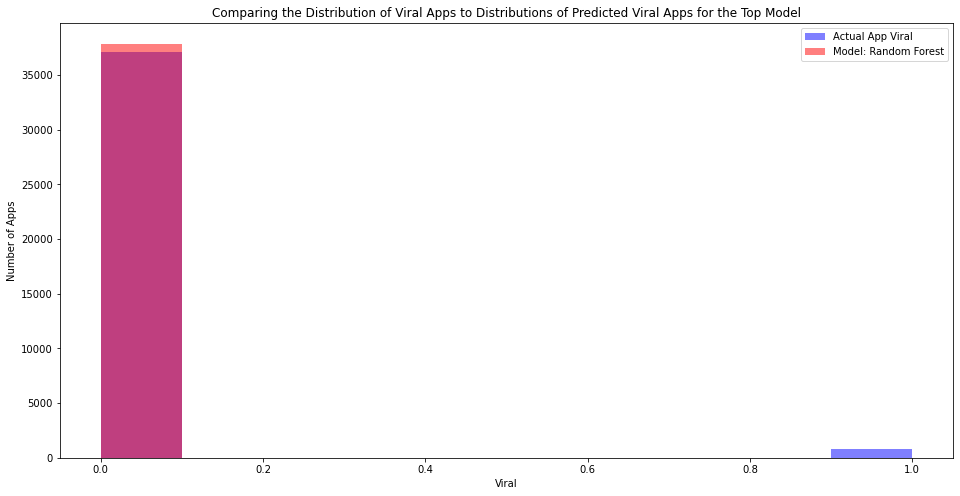

In [17]:
am.auto_random_trees_test_with_entropy(X_test, y_test, X_train, y_train)

### Test model Beats baseline with a accuracy score of 97.98% with a precision score of 77%

# Using a Random Forest of Random Forests model 
### This is an experament to increase predictive accuracy 
* This uses 3 random forest models tied together with a voting classifier. 

In [18]:
# Function to call the Random Forest of Random Forests
am.random_forest_voting_classifier(X_train, y_train, X_validate, y_validate)

DT1: 0.9813283119808531
DT2: 0.981389905673659
DT3: 0.9813723074757145
Ensemble: 0.9813195128818809
---------------------------------------------
DT1: 0.979779848480849
DT2: 0.9797534514162025
DT3: 0.9798326426101418
Ensemble: 0.979779848480849
---------------------------------------------
                      0           1  accuracy     macro avg  weighted avg
precision      0.979852    0.785714   0.97978      0.882783      0.975885
recall         0.999919    0.014212   0.97978      0.507066      0.979780
f1-score       0.989784    0.027919   0.97978      0.508851      0.970131
support    37109.000000  774.000000   0.97978  37883.000000  37883.000000


DT1: 0.979779848480849
DT2: 0.9797006572869097
DT3: 0.9796742602222633
Ensemble: 0.9797534514162025
---------------------------------------------
                      0           1  accuracy     macro avg  weighted avg
precision      0.979826    0.750000  0.979753      0.864913      0.975137
recall         0.999919    0.011643  0.979753      0.505781      0.979753
f1-score       0.989771    0.022930  0.979753      0.506350      0.970042
support    37110.000000  773.000000  0.979753  37883.000000  37883.000000


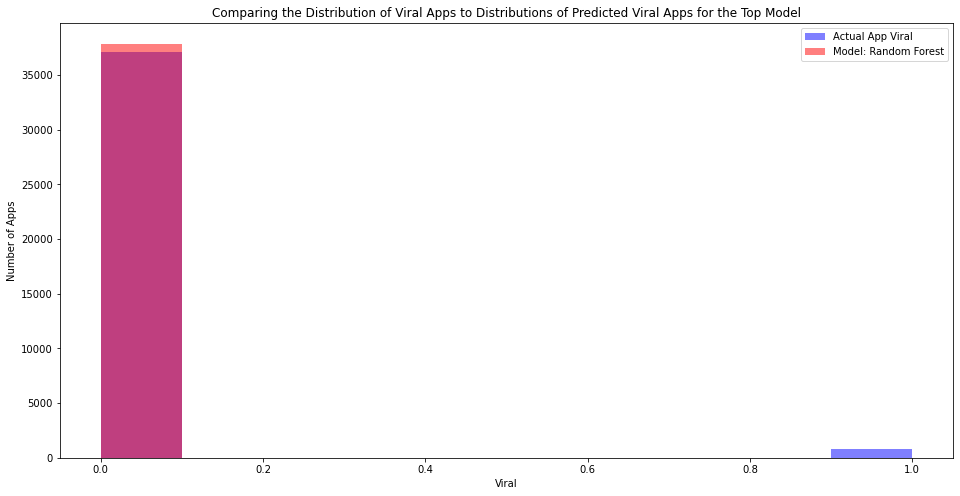

In [19]:
# Random Forest Classifier Ensemble 
am.random_forest_voting_classifier_test(X_train, y_train, X_test, y_test)


<div class="alert alert-block alert-info">

## Initial model performance and Conclusions
### Throughout 1st and 2nd iterations most models failed to beat the baseline of 97.96%. During the 2nd iteration and with all the features sent in a random forest model with a max  depth of 18 and with criterion set to “entropy” beat base line with a accuracy score of 97.98% overall accuracy and with precision score of 77%.
### On the 3rd iteration the random forest voting classifier beat baseline with an accuracy score of 97.98% with an precision score of 75%. 
#### Precision scores for the random forest voting classifier:
    - Viral No : 97.98%
    - Viral Yes : 75%
### While performing well, the random forest voting classifier did significantly improve performance over a traditional random forest.    

<div class="alert alert-block alert-info">
    
# Project Conclusion
    

### Explore:
   
* In-app purchases and file size had were the greatist indecators of viral likeliness. 
  
* Editors choice was more important to viral likeliness than general customer ratings. 
  
* How long an app has been on the market has suprisinginly
  
* How long an app has been on the market has surprising little to do with viral success. 
    
### Modeling:

* After much experimentation, random forest remains one of the top performing models with an accuracy score of 97.98% (beating the baseline of 97.96%) with a relatively high precision score of 77% even beating the random forest voting classifier’s precision score by 2%. While not performing as well as the vanilla random forest model the random forest voting classifier (random forest of random forests) can be an useful tool in future projects.
    

    
### Recommendations and Next Steps:
 
In order to fully capture the variables that go into making an app a viral success, more data is needed on each app’s human network, i.e. grassroots marketing campaigns, social media campaigns, crowd-funding, etc.  There is more that makes a popular app than file-size and editor’s choice awards.  